In [1]:
import best_brain as bb
from data_manager import LoaderOHLCV

cuda:0


In [2]:
# Train parameters
learning_rate = 0.001
num_epochs = 10 # Epoch: Passes the entire training dataset to the model once
input_file_name = 'Train_1_minute.csv'
bb.load_data_mode = 2    

In [3]:
# model_name has to end with pth
model_name = "CleanupTest.pth"
bb.model_path = bb.create_model_path(model_name)

In [4]:
# Loads model to device
bb.model.to(bb.device)

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [5]:
# Loads an prepares dataset
DataManager = LoaderOHLCV(bb.look_back,bb.load_data_mode, input_file=input_file_name)
X_train, X_test, y_train, y_test = DataManager.get_data_as_tensor()
train_dataset, test_dataset = DataManager.to_dataset(X_train, X_test, y_train, y_test)
train_loader, test_loader = DataManager.to_dataLoader(train_dataset, test_dataset, bb.batch_size)

loading raw data
spliting data
shape of X_train (889152, 10)
shape of X_test (222288, 10)
reshaping data to tensors
to dataset
to dataloader


In [6]:
# Trains model
bb.train_model(train_loader, num_epochs, learning_rate)

Epoch: 0
saving model
Model saved as e:\programovani\2023-3e-prophet\models\CleanupTest.pth
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
saving model
Model saved as e:\programovani\2023-3e-prophet\models\CleanupTest.pth
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
saving model
Model saved as e:\programovani\2023-3e-prophet\models\CleanupTest.pth


creating train graph


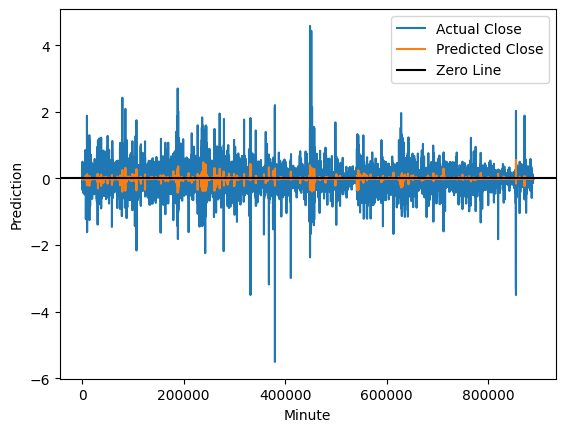

creating test graph


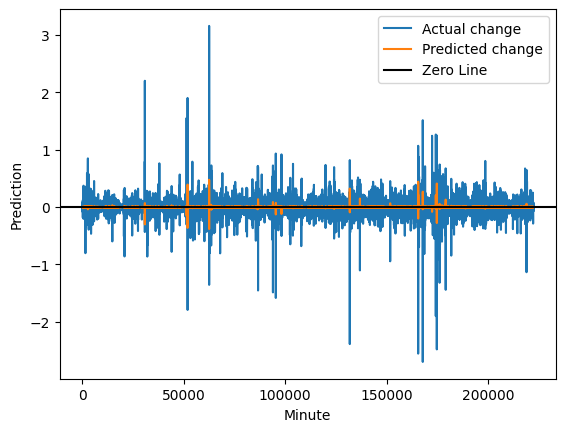

In [7]:
# Creates grpahs
bb.create_train_graph(X_train, y_train)
bb.create_test_graph(X_test, y_test)